# 1. Thiết Lập Và Khởi Tạo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.7 MB/s eta 0:00:00


In [ ]:
# Tắt hiển thị tất cả các cảnh báo
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import các thư viện cần thiết
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [ ]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

# 2.Load Model

In [ ]:
model = YOLO('/content/drive/MyDrive/Pr_GiaoThongThongMinh/YOLO/yolov8n.pt')


image 1/1 /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_image.jpg: 384x640 5 cars, 73.9ms
Speed: 19.9ms preprocess, 73.9ms inference, 747.2ms postprocess per image at shape (1, 3, 384, 640)


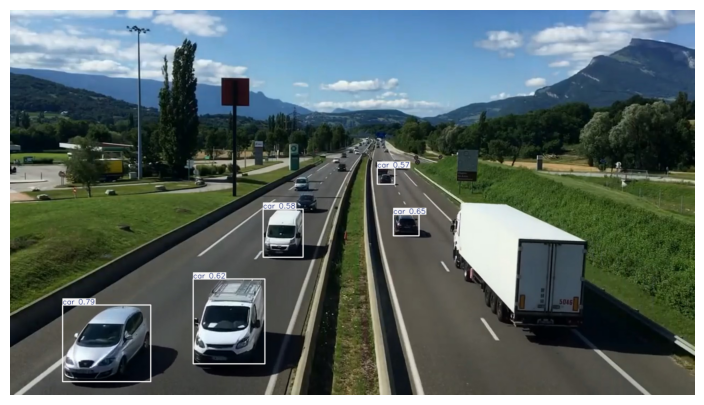

In [ ]:
image_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_image.jpg'

# Dự Đoán Các Ảnh Được Cung cấp
results = model.predict(source=image_path,
                        imgsz=640,
                        conf=0.5)

sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Hiển Thị
plt.figure(figsize=(10,5))
plt.imshow(sample_image)
plt.axis('off')
plt.show()

# 3,Xét Dữ Liệu

In [ ]:
dataset_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset'

# đặt đường dẫn tới file Yaml
yaml_file_path = os.path.join(dataset_path, '/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/data.yaml')

with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- vehicle
nc: 1
train: /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/train/images
val: /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/valid/images



In [ ]:
# Đặt đường dẫn cho bộ ảnh huấn luyện và xác nhận
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Khởi tạo bộ đếm số lượng ảnh
num_train_images = 0
num_valid_images = 0

# Khởi tạo các bộ để giữ kích thước duy nhất của hình ảnh
train_image_sizes = set()
valid_image_sizes = set()

# Kiểm tra kích thước và số lượng hình ảnh xe
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Kiểm tra kích thước và số lượng hình ảnh thẩm định
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

print(f"Số lượng hình ảnh đào tạo: {num_train_images}")
print(f"Số lượng hình ảnh thẩm định: {num_valid_images}")

# Kiểm tra xem tất cả các ảnh trong tập huấn luyện có cùng kích thước không
if len(train_image_sizes) == 1:
    print(f"Tất cả các hình ảnh đào tạo có cùng kích thước: {train_image_sizes.pop()}")
else:
    print(" Hình ảnh đào tạo có kích thước khác nhau")

# Kiểm tra xem tất cả hình ảnh trong bộ xác thực có cùng kích thước không
if len(valid_image_sizes) == 1:
    print(f"Tất cả các hình ảnh thẩm định có cùng kích thước: {valid_image_sizes.pop()}")
else:
    print("Hình ảnh thẩm định có kích thước khác nhau.")

Số lượng hình ảnh đào tạo: 536
Số lượng hình ảnh thẩm định: 90
Tất cả các hình ảnh đào tạo có cùng kích thước: (640, 640)
Tất cả các hình ảnh thẩm định có cùng kích thước: (640, 640)


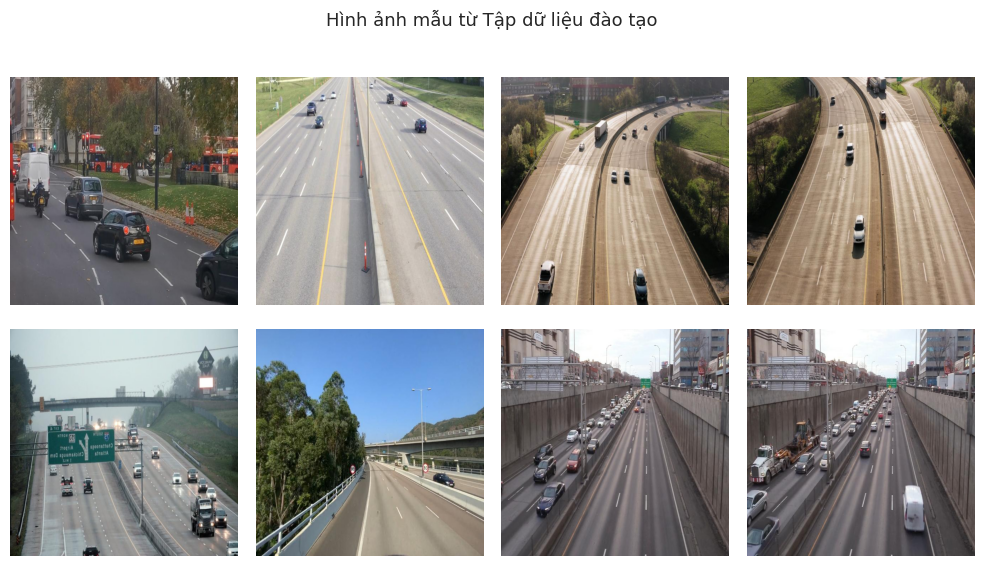

In [ ]:
# Liệt kê tất cả ảnh jpg trong thư mục
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]

# Chọn 8 hình ảnh với khoảng thời gian bằng nhau
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]

# Tạo 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

# Hiển thị từng hình ảnh đã chọn
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Hình ảnh mẫu từ Tập dữ liệu đào tạo', fontsize=13)
plt.tight_layout()
plt.show()

# 4. Tinh Chỉnh YOLOv8

In [ ]:
results = model.train(
    data=yaml_file_path,
    epochs=100,
    imgsz=640,
    device=0,
    patience=50,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.1,
    dropout=0.1,
    seed=0
)

Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Pr_GiaoThongThongMinh/YOLO/yolov8n.pt, data=/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

100%|██████████| 755k/755k [00:00<00:00, 38.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 196MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/train/labels.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.06G      2.428      2.967      1.852        271        640: 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all         90        937    0.00374      0.108    0.00368    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.31G      1.518      1.301      1.198        365        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         90        937     0.0115       0.21     0.0711      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.99G      1.275     0.9898      1.063        310        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        937      0.904      0.633      0.736       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.87G      1.208     0.8823      1.029        310        640: 100%|██████████| 17/17 [00:13<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all         90        937      0.842      0.837      0.901      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.57G      1.182     0.8391      1.018        421        640: 100%|██████████| 17/17 [00:10<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         90        937       0.82      0.851      0.899      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.53G      1.152     0.8009      1.008        296        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         90        937      0.839      0.863      0.923      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.61G      1.126     0.7457     0.9919        309        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         90        937      0.848      0.891      0.945      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.83G      1.116     0.7276     0.9916        389        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.856      0.908      0.945      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.43G      1.098     0.6908     0.9785        469        640: 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         90        937      0.883      0.926      0.963      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.78G      1.094      0.685      0.983        221        640: 100%|██████████| 17/17 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         90        937      0.847      0.887      0.931       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.89G      1.068     0.6548     0.9777        298        640: 100%|██████████| 17/17 [00:10<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.901      0.925       0.96      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.64G      1.089     0.6664     0.9861        341        640: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         90        937      0.909      0.905      0.962      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.92G      1.076     0.6479     0.9729        426        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        937      0.888      0.893      0.949       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.92G      1.058     0.6244     0.9721        434        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         90        937      0.894      0.904      0.956      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.66G       1.06     0.6316     0.9749        308        640: 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         90        937      0.891       0.91      0.963      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.08G      1.039     0.6073     0.9613        263        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         90        937      0.897      0.915      0.959      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.96G      1.034     0.5991     0.9554        417        640: 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        937      0.885       0.92      0.961      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.33G      1.022     0.5911      0.958        322        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         90        937      0.892      0.932      0.959      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.81G      1.038     0.6169      0.958        288        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         90        937      0.902      0.934      0.969      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.05G      1.037     0.5946      0.958        320        640: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         90        937        0.9      0.919      0.966      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.24G      1.022     0.5851     0.9555        379        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         90        937       0.91      0.912      0.966      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.65G      1.012     0.5772       0.96        363        640: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         90        937      0.894      0.924      0.968      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.21G     0.9985     0.5587     0.9511        303        640: 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        937      0.904      0.911      0.965      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.3G     0.9972     0.5756     0.9505        274        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         90        937      0.903      0.924      0.963      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.28G      1.005     0.5669     0.9551        482        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         90        937      0.906      0.922      0.969      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.89G      1.016     0.5811     0.9497        346        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         90        937      0.904      0.928      0.971      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.68G     0.9805       0.56     0.9532        407        640: 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         90        937      0.927      0.908      0.974       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.69G     0.9975      0.555      0.953        400        640: 100%|██████████| 17/17 [00:15<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         90        937      0.912      0.926       0.97      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.87G     0.9862     0.5475     0.9443        264        640: 100%|██████████| 17/17 [00:15<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         90        937      0.928       0.92      0.973      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.46G     0.9897     0.5466      0.946        309        640: 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         90        937      0.929      0.917      0.972      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.65G     0.9778     0.5389     0.9441        285        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all         90        937      0.903      0.931      0.972       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.91G     0.9784     0.5384     0.9429        439        640: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         90        937      0.922      0.922      0.972      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.87G     0.9702     0.5362     0.9408        274        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         90        937      0.909      0.934      0.975      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.98G     0.9617     0.5274     0.9363        427        640: 100%|██████████| 17/17 [00:15<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         90        937      0.893      0.935       0.97      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.57G     0.9747     0.5321     0.9361        350        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         90        937      0.921      0.921      0.971      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.64G     0.9736     0.5295     0.9485        308        640: 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         90        937      0.912      0.919       0.96      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.92G     0.9542     0.5179     0.9381        329        640: 100%|██████████| 17/17 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         90        937       0.92      0.915      0.972       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.01G     0.9631     0.5264     0.9366        406        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.915      0.931      0.974      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.9G     0.9671     0.5219     0.9344        290        640: 100%|██████████| 17/17 [00:13<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         90        937      0.917      0.937      0.977      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.67G     0.9524     0.5128     0.9369        296        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         90        937      0.891      0.948       0.97      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.83G     0.9531     0.5147     0.9327        285        640: 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         90        937      0.908      0.938       0.97      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.17G     0.9304     0.4972     0.9285        472        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         90        937      0.913      0.938      0.969      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.54G     0.9475      0.509     0.9366        435        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         90        937      0.912      0.932       0.97      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.8G     0.9418     0.5178     0.9314        414        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937       0.92      0.933      0.975       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.76G     0.9253     0.5066     0.9266        389        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         90        937      0.917      0.928      0.971      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.6G     0.9245     0.4988     0.9261        426        640: 100%|██████████| 17/17 [00:14<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         90        937        0.9      0.932      0.965      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.21G     0.9353     0.5043     0.9258        435        640: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         90        937      0.921      0.907      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.54G      0.929     0.5043     0.9267        408        640: 100%|██████████| 17/17 [00:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         90        937      0.909      0.931      0.966      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.99G     0.9115     0.4873     0.9166        408        640: 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        937      0.921      0.921      0.971      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.97G     0.9236      0.496     0.9244        285        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         90        937      0.917      0.925      0.973      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       4.9G     0.9222     0.4977     0.9271        381        640: 100%|██████████| 17/17 [00:14<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         90        937        0.9      0.941      0.971      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.21G     0.9118      0.487     0.9299        359        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         90        937      0.921       0.91       0.97      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.06G     0.9014     0.4814     0.9217        424        640: 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         90        937      0.922      0.911      0.968      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.19G     0.8945     0.4739     0.9164        388        640: 100%|██████████| 17/17 [00:10<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         90        937      0.937      0.899      0.966      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.34G     0.8912     0.4837     0.9164        345        640: 100%|██████████| 17/17 [00:12<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         90        937      0.918      0.931       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.33G     0.9154     0.4909     0.9208        380        640: 100%|██████████| 17/17 [00:14<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         90        937      0.912      0.928      0.971      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.71G     0.9228     0.4795     0.9225        433        640: 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         90        937      0.899      0.947      0.971      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.68G      0.886     0.4701     0.9159        363        640: 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         90        937      0.898      0.937       0.97      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       4.7G     0.8918      0.477     0.9149        418        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         90        937      0.922       0.92      0.974      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.74G     0.8948     0.4758     0.9165        320        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        937      0.912      0.925      0.974      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       4.7G     0.8817     0.4672     0.9145        347        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.919      0.928      0.972      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         5G     0.8864     0.4747     0.9188        271        640: 100%|██████████| 17/17 [00:14<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         90        937       0.91      0.944      0.975      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.28G     0.9049     0.4764     0.9147        421        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         90        937      0.921      0.933      0.975      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.75G     0.8932      0.464     0.9185        283        640: 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         90        937      0.925      0.937      0.974      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.12G       0.89     0.4669     0.9179        287        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         90        937      0.924      0.924      0.974      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.18G     0.8703      0.455     0.9088        381        640: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         90        937      0.924      0.931      0.976      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.07G     0.8794     0.4647     0.9114        332        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.924      0.924      0.973      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.13G      0.876     0.4656     0.9188        396        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         90        937      0.924      0.917      0.967      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.09G     0.8737     0.4614     0.9119        302        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         90        937      0.922      0.931       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.52G     0.8701     0.4542     0.9122        357        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         90        937      0.885      0.943      0.965      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.27G     0.8672     0.4583     0.9121        282        640: 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        937        0.9      0.933       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.52G     0.8672     0.4547     0.9141        319        640: 100%|██████████| 17/17 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         90        937      0.918      0.934      0.974      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.99G     0.8768     0.4604     0.9126        349        640: 100%|██████████| 17/17 [00:15<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        937      0.902      0.935      0.967      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.81G     0.8649     0.4609     0.9066        331        640: 100%|██████████| 17/17 [00:14<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         90        937      0.915      0.934      0.971      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.93G     0.8734     0.4606     0.9079        415        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         90        937      0.914      0.934      0.976      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.03G     0.8506     0.4452       0.91        352        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         90        937      0.909      0.931      0.967      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.64G     0.8609     0.4513     0.9169        253        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         90        937      0.897      0.933       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.98G     0.8618     0.4467     0.9083        391        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         90        937      0.913      0.923       0.97      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.97G     0.8598     0.4479      0.907        364        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         90        937      0.904      0.954      0.974      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.86G     0.8547     0.4444     0.9067        231        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         90        937      0.922       0.92      0.969      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.94G     0.8502     0.4421     0.9044        256        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         90        937      0.891      0.953      0.973      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.14G     0.8597     0.4449     0.9067        292        640: 100%|██████████| 17/17 [00:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         90        937      0.903      0.939      0.967      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.85G     0.8508     0.4456     0.8961        432        640: 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         90        937      0.909      0.935      0.972      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.93G      0.849     0.4412     0.9033        382        640: 100%|██████████| 17/17 [00:14<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         90        937      0.921      0.924      0.969      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.7G     0.8363     0.4359     0.9021        339        640: 100%|██████████| 17/17 [00:14<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         90        937      0.912      0.931      0.968      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.16G     0.8434     0.4348     0.9041        333        640: 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         90        937      0.888      0.947      0.967      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.78G     0.8396     0.4303     0.8995        454        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         90        937      0.913      0.939      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.5G     0.8209     0.4244     0.8977        357        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         90        937      0.926      0.918      0.961      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.89G     0.8247      0.431     0.8986        302        640: 100%|██████████| 17/17 [00:14<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        937      0.918      0.934      0.971      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.57G     0.8254     0.4307     0.8965        323        640: 100%|██████████| 17/17 [00:14<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         90        937      0.921      0.926      0.969      0.735


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.79G     0.8105      0.415     0.9059        262        640: 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        937      0.901      0.937      0.968       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.4G     0.8079     0.4039     0.9033        249        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        937      0.924       0.92      0.969      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.44G      0.802     0.4066     0.8925        209        640: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         90        937      0.939      0.917      0.972      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.42G     0.8014     0.4042     0.8954        247        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         90        937      0.932      0.926      0.973      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.39G     0.7958     0.3963     0.8881        224        640: 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         90        937      0.917      0.935      0.967       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.44G     0.7932      0.392     0.8899        215        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         90        937      0.932      0.934      0.975       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.42G     0.7866     0.3878     0.8928        183        640: 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         90        937       0.94      0.917      0.975      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       4.4G     0.7806     0.3922     0.8858        177        640: 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all         90        937      0.922      0.939      0.971       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.42G     0.7917     0.3917     0.8896        278        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         90        937      0.914      0.938       0.97      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.42G      0.785     0.3865      0.892        295        640: 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        937      0.931      0.928      0.971      0.737



100 epochs completed in 0.475 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


                   all         90        937      0.903      0.954      0.974      0.745
Speed: 0.4ms preprocess, 2.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


# 5. Đánh Giá Hiệu Suất Model

In [ ]:
# Xác định đường dẫn đến thư mục
post_training_files_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/runs/detect/train'

In [ ]:
# Xác định hàm để vẽ đường cong học tập cho các giá trị tổn thất
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

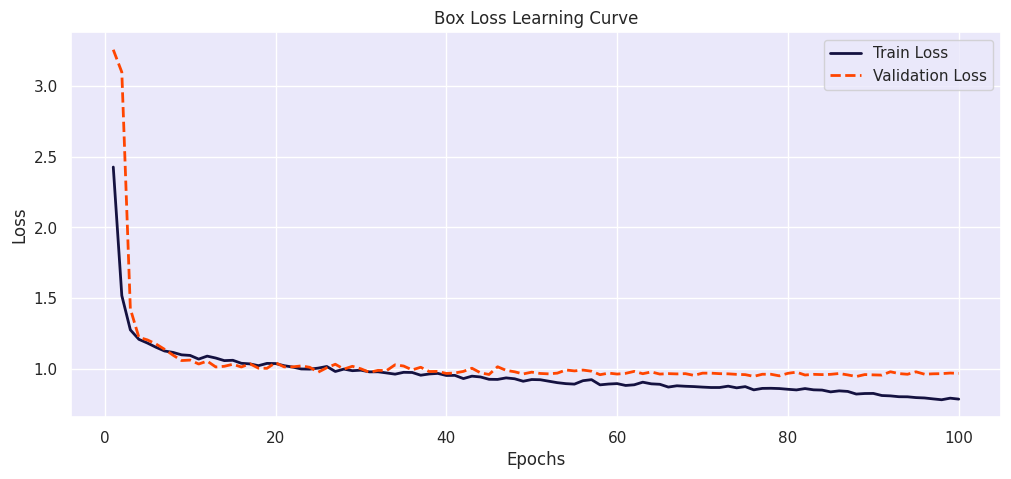

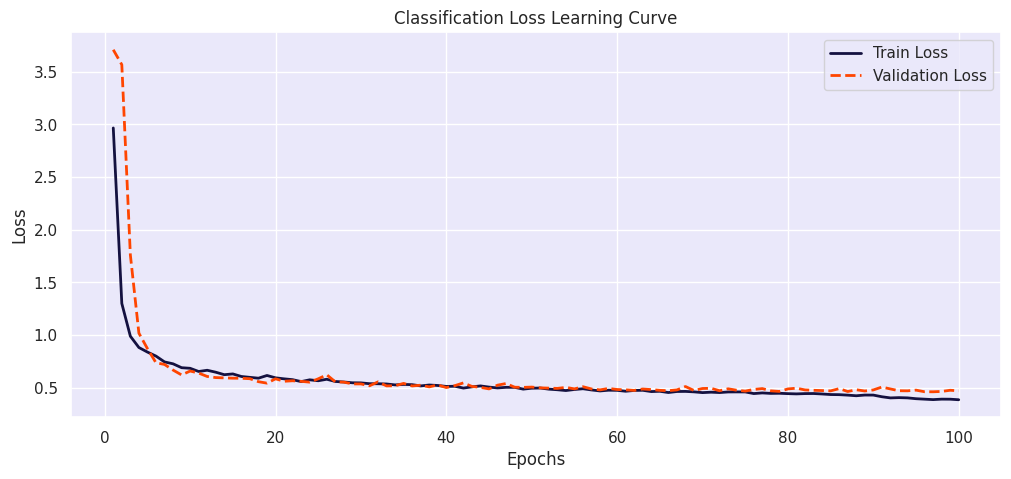

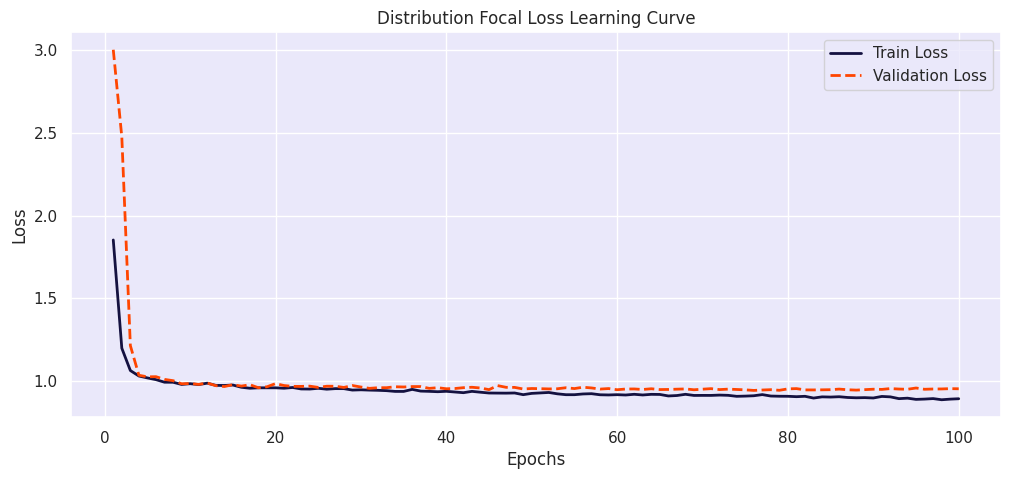

In [ ]:
# Tạo đường dẫn tệp đầy đủ cho 'results.csv' bằng đường dẫn thư mục và tên tệp
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Tải tệp CSV từ đường dẫn được xây dựng vào DataFrame của gấu trúc
df = pd.read_csv(results_csv_path)

# Xóa mọi khoảng trắng ở đầu tên cột
df.columns = df.columns.str.strip()
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

## Đánh Giá Matrix confusion

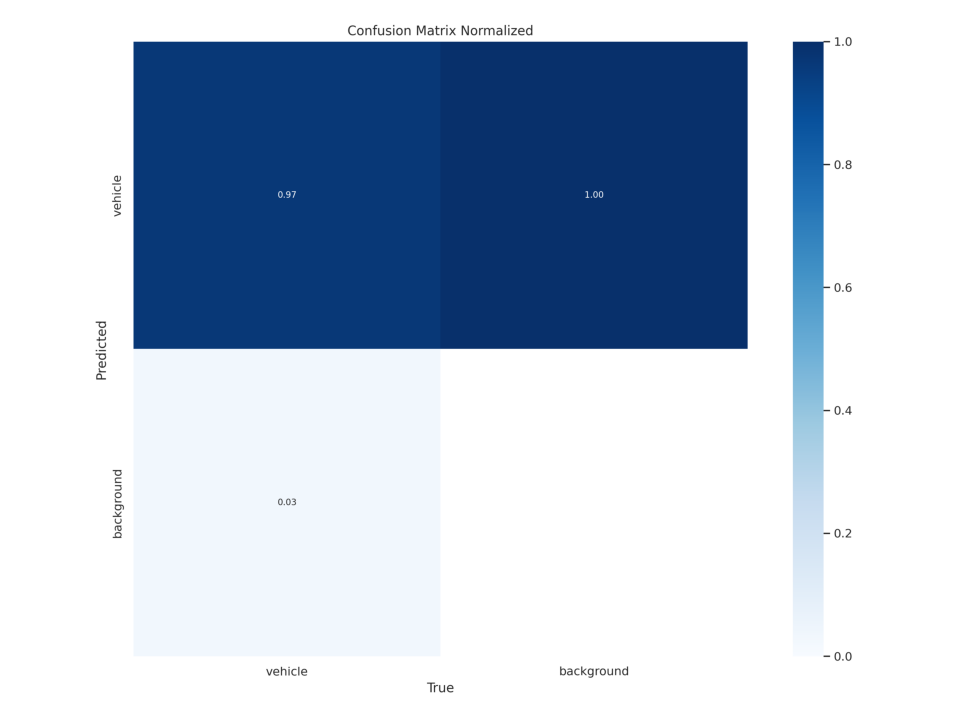

In [ ]:
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

cm_img = cv2.imread(confusion_matrix_path)

cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

## Đánh giá số liệu hiệu suất

In [ ]:
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

best_model = YOLO(best_model_path)

# Xác thực mô hình tốt nhất bằng cách sử dụng bộ xác thực với các tham số mặc định
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]


                   all         90        937      0.904      0.954      0.974      0.746
Speed: 0.5ms preprocess, 15.7ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Chuyển đổi từ điển thành DataFrame của gấu trúc và sử dụng các khóa làm chỉ mục
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

metrics_df.round(3)

,Metric Value
metrics/precision(B),0.904
metrics/recall(B),0.954
metrics/mAP50(B),0.974
metrics/mAP50-95(B),0.746
fitness,0.768


from matplotlib import pyplot as plt
_df_0['Metric Value'].plot(kind='hist', bins=20, title='Metric Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Metric Value'].plot(kind='line', figsize=(8, 4), title='Metric Value')
plt.gca().spines[['top', 'right']].set_visible(False)

# Đánh giá suy luận và khái quát hóa mô hình

Suy luận về bộ hình ảnh xác thực

In [ ]:
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Hình Ảnh Xác Thực', fontsize=24)

for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Suy luận về một hình ảnh thử nghiệm chưa nhìn thấy


image 1/1 /content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_image.jpg: 384x640 8 vehicles, 53.4ms
Speed: 15.1ms preprocess, 53.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


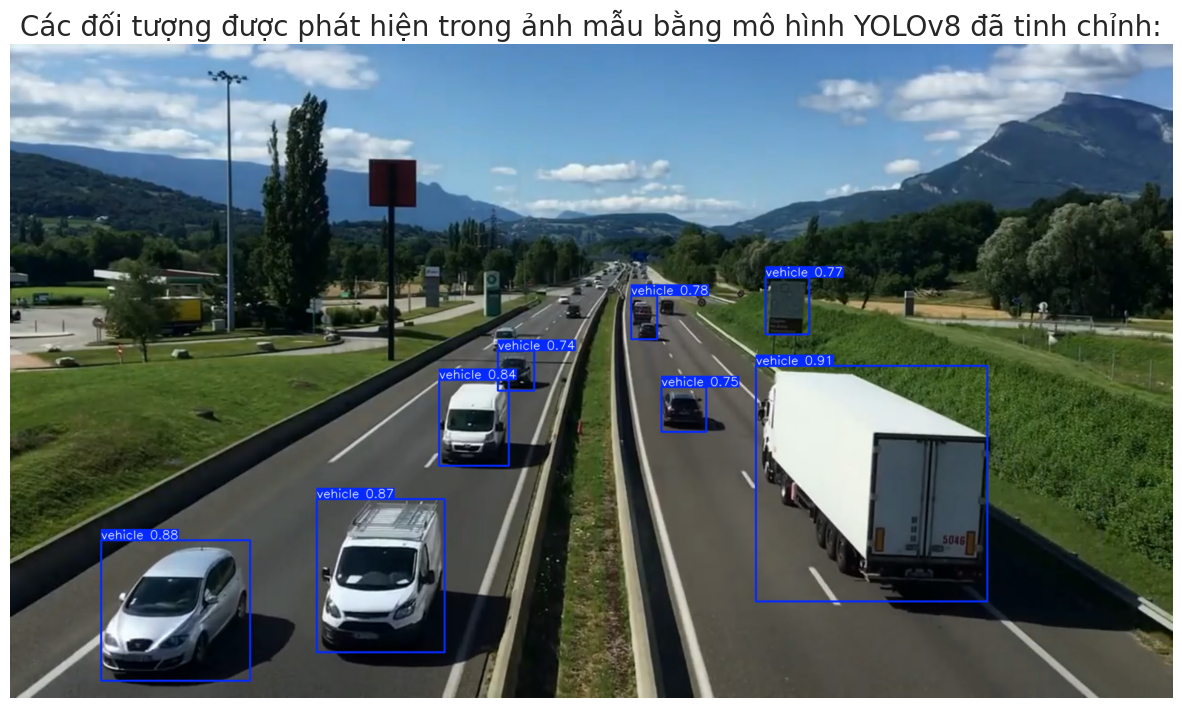

In [ ]:
sample_image_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_image.jpg'

# Thực hiện suy luận về hình ảnh được cung cấp bằng mô hình tốt nhất
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7)

sample_image = results[0].plot(line_width=2)

sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(sample_image)
plt.title('Các đối tượng được phát hiện trong ảnh mẫu bằng mô hình YOLOv8 đã tinh chỉnh:', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
import os
import shutil
from IPython.display import Video

# Set paths
dataset_video_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_video.mp4'
video_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/sample_video.mp4'
processed_video_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/processed_sample_video.mp4'

# Copy
shutil.copyfile(dataset_video_path, video_path)

# Thực hiện dự đoán trên video bằng best_model
best_model.predict(source=video_path, save=True)

# Chuyển đổi video .avi được tạo bởi dự đoán YOLOv8 sang định dạng .mp4 bằng ffmpeg
os.system('LC_CTYPE=en_US.UTF-8 ffmpeg -y -loglevel panic -i /content/drive/MyDrive/Pr_GiaoThongThongMinh/runs/detect/predict/sample_video.avi -c:v libx264 -pix_fmt yuv420p ' + processed_video_path)

Video(processed_video_path, embed=True, width=960)


Output hidden; open in https://colab.research.google.com to view.

# 7. Ước tính cường độ giao thông theo thời gian thực

In [ ]:
# Xác định ngưỡng để coi lưu lượng truy cập là đông đúc
heavy_traffic_threshold = 10

# Xác định các đỉnh
vertices1 = np.array([(465, 350), (609, 350), (510, 630), (2, 630)], dtype=np.int32)
vertices2 = np.array([(678, 350), (815, 350), (1203, 630), (743, 630)], dtype=np.int32)

# Xác định phạm vi dọc cho ngưỡng lát cắt và làn đường
x1, x2 = 325, 635
lane_threshold = 609

# Xác định vị trí cho chú thích văn bản trên hình ảnh
text_position_left_lane = (10, 50)
text_position_right_lane = (820, 50)
intensity_position_left_lane = (10, 100)
intensity_position_right_lane = (820, 100)

# Xác định phông chữ, tỷ lệ và màu sắc cho chú thích
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)
background_color = (0, 0, 255)

cap = cv2.VideoCapture('/content/drive/MyDrive/Pr_GiaoThongThongMinh/DATA/Vehicle_Detection_Image_Dataset/sample_video.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/MyDrive/Pr_GiaoThongThongMinh/traffic_density_analysis.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():

    ret, frame = cap.read()
    if ret:
        detection_frame = frame.copy()
        detection_frame[:x1, :] = 0
        detection_frame[x2:, :] = 0

        # Thực hiện suy luận trên khung đã sửa đổi
        results = best_model.predict(detection_frame, imgsz=640, conf=0.4)
        processed_frame = results[0].plot(line_width=1)

        processed_frame[:x1, :] = frame[:x1, :].copy()
        processed_frame[x2:, :] = frame[x2:, :].copy()

        # Vễ Khung
        cv2.polylines(processed_frame, [vertices1], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.polylines(processed_frame, [vertices2], isClosed=True, color=(255, 0, 0), thickness=2)

        # Lấy bounding box của các đối tượng phát hiện
        bounding_boxes = results[0].boxes

        # Khởi tạo bộ đếm cho xe ở mỗi làn đường
        vehicles_in_left_lane = 0
        vehicles_in_right_lane = 0

        # Đếm xe trong mỗi làn đường
        for box in bounding_boxes.xyxy:
            if box[0] < lane_threshold:
                vehicles_in_left_lane += 1
            else:
                vehicles_in_right_lane += 1

        # Xác định cường độ giao thông cho làn đường bên trái
        traffic_intensity_left = "Heavy" if vehicles_in_left_lane > heavy_traffic_threshold else "Smooth"
        # Xác định cường độ giao thông cho làn đường bên phải
        traffic_intensity_right = "Heavy" if vehicles_in_right_lane > heavy_traffic_threshold else "Smooth"


        # Thêm hình chữ nhật nền cho số lượng xe ở làn bên trái
        cv2.rectangle(processed_frame, (text_position_left_lane[0]-10, text_position_left_lane[1] - 25),
                      (text_position_left_lane[0] + 460, text_position_left_lane[1] + 10), background_color, -1)

        # Thêm văn bản đếm xe ở đầu hình chữ nhật cho làn đường bên trái
        cv2.putText(processed_frame, f'Vehicles in Left Lane: {vehicles_in_left_lane}', text_position_left_lane,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Thêm hình chữ nhật nền cho cường độ giao thông ở làn bên trái
        cv2.rectangle(processed_frame, (intensity_position_left_lane[0]-10, intensity_position_left_lane[1] - 25),
                      (intensity_position_left_lane[0] + 460, intensity_position_left_lane[1] + 10), background_color, -1)

        # Thêm văn bản cường độ giao thông ở trên cùng hình chữ nhật cho làn đường bên trái
        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_left}', intensity_position_left_lane,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Thêm hình chữ nhật nền cho số lượng xe ở làn bên phải
        cv2.rectangle(processed_frame, (text_position_right_lane[0]-10, text_position_right_lane[1] - 25),
                      (text_position_right_lane[0] + 460, text_position_right_lane[1] + 10), background_color, -1)

        # Thêm văn bản đếm xe ở đầu hình chữ nhật cho làn đường bên phải
        cv2.putText(processed_frame, f'Vehicles in Right Lane: {vehicles_in_right_lane}', text_position_right_lane,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Thêm hình chữ nhật nền cho cường độ giao thông ở làn bên phải
        cv2.rectangle(processed_frame, (intensity_position_right_lane[0]-10, intensity_position_right_lane[1] - 25),
                      (intensity_position_right_lane[0] + 460, intensity_position_right_lane[1] + 10), background_color, -1)

        # Thêm văn bản cường độ giao thông ở trên cùng hình chữ nhật cho làn đường bên phải
        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_right}', intensity_position_right_lane,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Ghi khung đã xử lý vào video đầu ra
        out.write(processed_frame)

    else:
        break
cap.release()
out.release()



0: 384x640 (no detections), 24.8ms
Speed: 2.4ms preprocess, 24.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 2.1ms preprocess, 30.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.5ms
Speed: 2.5ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.0ms
Speed: 3.6ms preprocess, 11.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 3.2ms preprocess, 10.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 2.5ms preprocess, 9.8ms inf

In [ ]:
processed_video_path = '/content/drive/MyDrive/Pr_GiaoThongThongMinh/traffic_density_analysis.mp4'

os.system('LC_CTYPE=en_US.UTF-8 ffmpeg -y -loglevel panic -i /content/drive/MyDrive/Pr_GiaoThongThongMinh/traffic_density_analysis.avi -c:v libx264 -pix_fmt yuv420p ' + processed_video_path)

# Nhúng và hiển thị video mẫu đã xử lý
Video("traffic_density_analysis.mp4", embed=True, width=960)